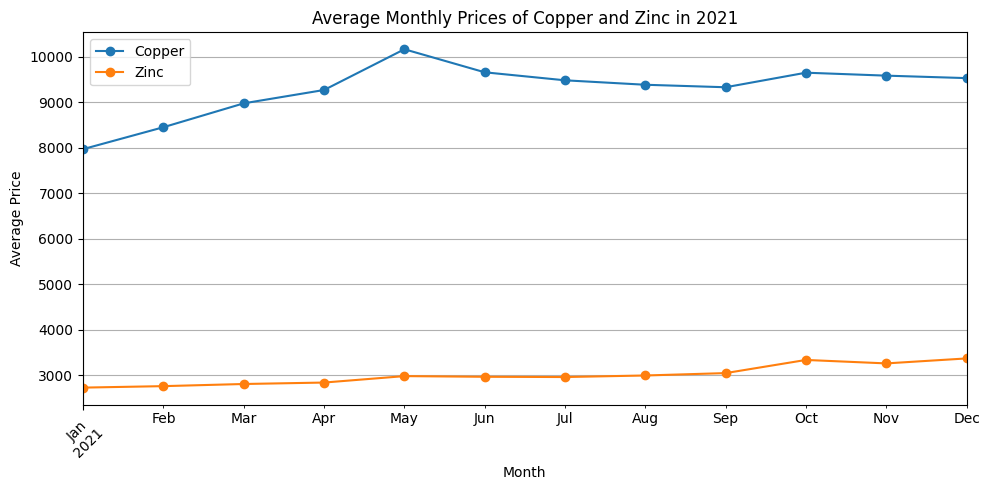

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file, skipping the 6 metadata rows at the top
df = pd.read_csv('../data/MarketData.csv', skiprows=6)

# Rename columns for clarity: keep only Date, Copper, and Zinc columns
df.rename(columns={
    'Dates': 'Date',
    'PX_SETTLE': 'Copper',
    'PX_SETTLE.2': 'Zinc'
}, inplace=True)

# Keep only the relevant columns
df = df[['Date', 'Copper', 'Zinc']]

# Convert the Date column to datetime format
# 'dayfirst=True' ensures European-style dates (e.g., 01/12/2021 = Dec 1st)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop any rows where the date couldn't be parsed or where prices are missing
df.dropna(subset=['Date', 'Copper', 'Zinc'], inplace=True)

# Filter the DataFrame to include only rows from the year 2021
df_2021 = df[df['Date'].dt.year == 2021].copy()

# Extract the month (as Period) for grouping purposes
df_2021.loc[:, 'Month'] = df_2021['Date'].dt.to_period('M')

# Group by month and calculate the average price for each metal
monthly_avg = df_2021.groupby('Month')[['Copper', 'Zinc']].mean()

# Plot the monthly average prices
ax = monthly_avg.plot(marker='o', figsize=(10, 5))
ax.set_title('Average Monthly Prices of Copper and Zinc in 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.grid(True)

# Rotate x-axis labels for readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
